# Naive Time Series Forecasting

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('data/daily_min_temp.csv',index_col="Date",parse_dates=["Date"])

In [67]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [68]:
df = df.resample("M").mean()

In [69]:
df

,Temp
Date,
1981-01-31,17.712903
1981-02-28,17.678571
1981-03-31,13.500000
1981-04-30,12.356667
1981-05-31,9.490323
...,...
1990-08-31,7.825806
1990-09-30,9.166667
1990-10-31,11.345161


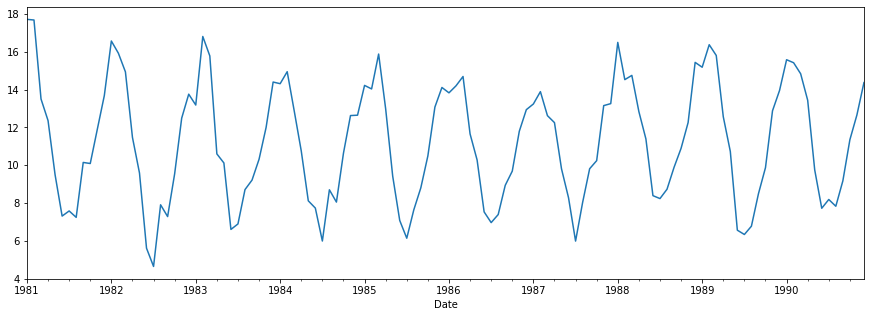

In [70]:
df.Temp.plot(figsize=(15,5))

In [71]:
pred = df.copy()
pred = pred.shift()

In [72]:
pred

,Temp
Date,
1981-01-31,NaN
1981-02-28,17.712903
1981-03-31,17.678571
1981-04-30,13.500000
1981-05-31,12.356667
...,...
1990-08-31,8.183871
1990-09-30,7.825806
1990-10-31,9.166667


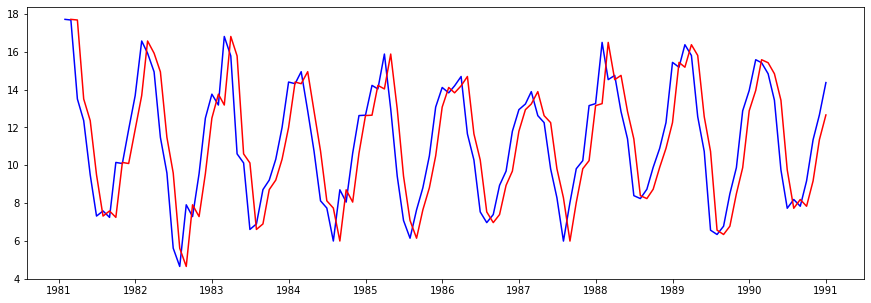

In [73]:
plt.figure(figsize=(15,5))
plt.plot(df,"b-")
plt.plot(pred,"r-")

## Mean as Forcast 

In [76]:
pred = df.copy()
pred.Temp = [df.loc[:date].Temp.mean() for date in df.index]
pred = pred.shift()

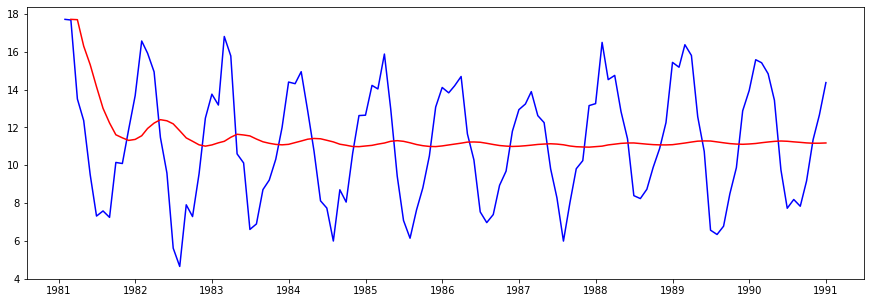

In [77]:
plt.figure(figsize=(15,5))
plt.plot(df,"b-")
plt.plot(pred,"r-")

## Moving Average

In [80]:
pred = df.copy()
pred.Temp = df.rolling(3).mean()
pred = pred.shift()

In [81]:
pred

,Temp
Date,
1981-01-31,NaN
1981-02-28,NaN
1981-03-31,NaN
1981-04-30,16.297158
1981-05-31,14.511746
...,...
1990-08-31,8.550753
1990-09-30,7.909892
1990-10-31,8.392115


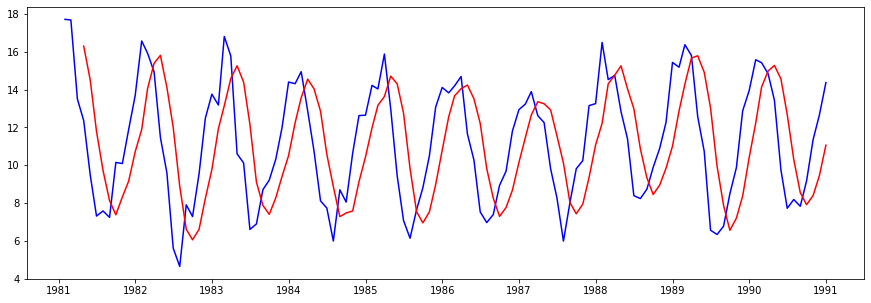

In [82]:
plt.figure(figsize=(15,5))
plt.plot(df,"b-")
plt.plot(pred,"r-")